This notebook demonstrated finding the hidden shift of a "bent" function as described in "Quantum algorithms for highly non-linear Boolean functions" by Martin Roetteler Proceedings of the 21st Annual ACM-SIAM Symposium on Discrete Algorithms (SODA'10), pp. 448-457, 2010, arXiv:0811.3208


In [1]:
import qiskit as qk
from qiskit.tools.visualization import plot_histogram

#import python tools
import numpy as np
import matplotlib.pyplot as plt
import math

from python.hidden_shift import *

We use `qasm_simulator` of Qiskit Aer in this notebook.

In [2]:
simulator = qk.Aer.get_backend('qasm_simulator')

We use `build_model_circuit()` to generate a circuit to solve one instance of the hidden shift problem. 

In [3]:
hsp = build_model_circuit(n_qubits=4, hidden_shift=7)

hidden shift:  0b0111
---------------------------
permutation pattern:  [1 0]
boolean_function: [-1, -1, -1, -1]


This circuit implements a Maiorana-McFarland bent function with a hidden shift.  
Maiorana-McFarland bent functions  are defined by a permutation and an arbitrary boolean function on n/2 qubits.  These are chosen at random and printed out above.

Draw the circuit:

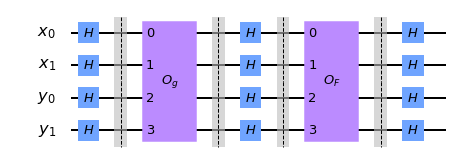

In [4]:
hsp.draw(output="mpl", fold=50, scale=0.5)

To see the gates that make up the circuit, we can use the transpiler to unroll the circuit to more basic gates. 

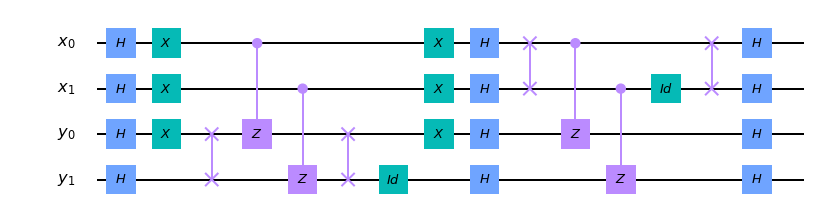

In [5]:
from qiskit import transpile, assemble
unrolled_hsp = transpile(hsp, basis_gates=['cx', 'h', 'u3', 'swap', 'cz', 'x', 'id'])
unrolled_hsp.draw(output='mpl', fold=500, plot_barriers=False)

This circuit returns a bitstring that gives the shift specified by the z-gates in the middle of the circuit

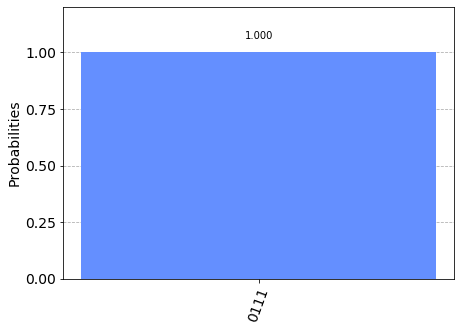

In [6]:
hsp.measure_all()            
result = qk.execute(hsp, simulator).result()
plot_histogram(result.get_counts())

In [7]:
shift_bitstring = next(iter(result.get_counts()))
print(shift_bitstring)

0111


Now we run it on real hardware.

In [20]:
import qiskit.tools.jupyter
qk.IBMQ.load_account()
system = qk.IBMQ.providers()[-1].get_backend('ibmq_johannesburg')

Credentials are already in use. The existing account in the session will be replaced.


In [21]:
system

<IBMQBackend('ibmq_johannesburg') from IBMQ(hub='perf-on-client-d', group='rocket', project='asplos')>

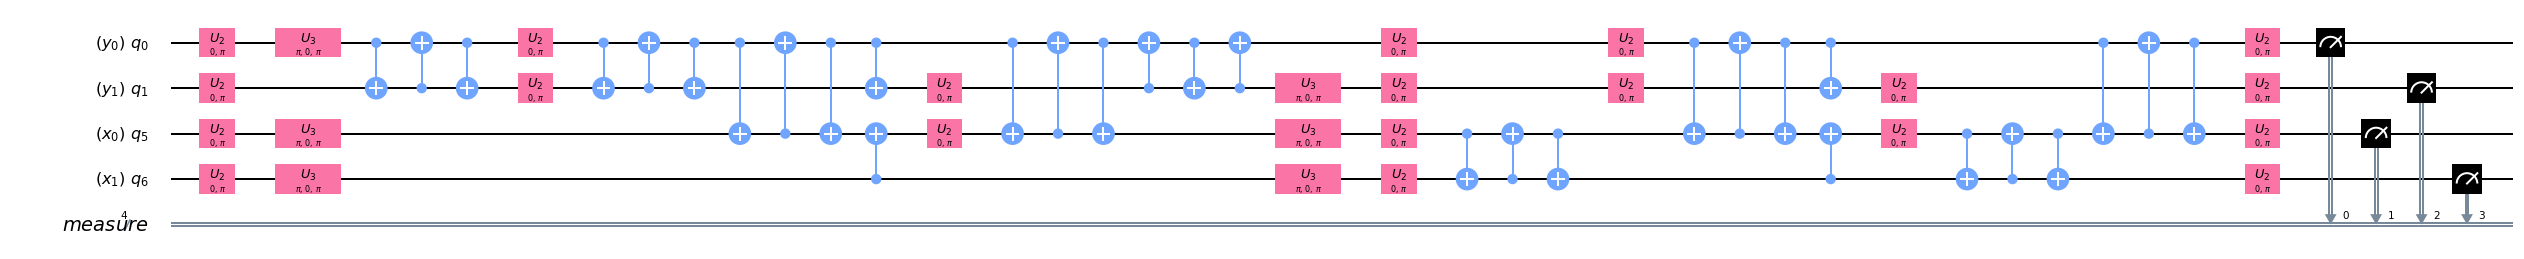

In [22]:
system_hsp = transpile(hsp, system, optimization_level=3)
system_hsp.draw(output='mpl', fold=500, plot_barriers=False, idle_wires=False)

In [36]:
system_hsp.depth()

39

In [24]:
qobj = assemble(system_hsp, shots=1000)
job = system.run(qobj)

In [34]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [33]:
system.status()

BackendStatus(backend_name='ibmq_johannesburg', backend_version='1.1.1', operational=True, pending_jobs=5, status_msg='active')

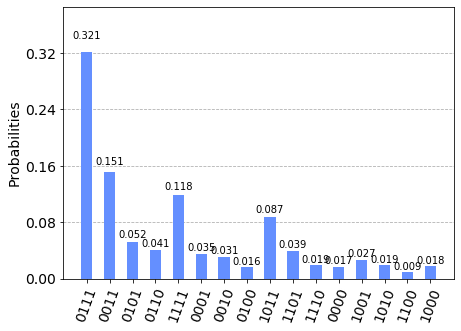

In [35]:
plot_histogram(job.result().get_counts(), target_string=shift_bitstring, sort='hamming')